To Do :

Feature Enginering
* ✅ YrSold - YearBuilt = total_house_age
* ✅ YrSold - YearRemodAdd = renov_age
* ✅ YrSold - GarageYrBlt = garage_age (condition : jika GarageYrBlt = 0, maka garage_age = 0)

dimensional reduction gunakan T-Sne


# **Import Module**

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lightgbm as lgb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.decomposition import PCA

# ML Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

# **Load Dataset**

In [148]:
dftrn = pd.read_csv('train.csv')
dftes = pd.read_csv('test.csv')
df_train = dftrn.copy().drop(columns="Id")
df_test = dftes.copy().drop(columns="Id")
dftrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [149]:
# menampilkan seluruh kolom
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train.sample(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
85,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,260000
1009,50,RL,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,5,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Ex,Y,SBrkr,1008,0,514,1522,0,0,2,0,4,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,0,0,138,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,102000
654,20,RL,91.0,10437,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,6,1995,1995,Hip,CompShg,MetalSd,MetalSd,BrkFace,660.0,Gd,Gd,PConc,Gd,TA,Gd,GLQ,1696,Unf,0,413,2109,GasA,Ex,Y,SBrkr,2113,0,0,2113,1,0,2,1,2,1,Gd,7,Typ,1,TA,Attchd,1995.0,Fin,3,839,TA,TA,Y,236,46,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,350000
1237,60,RL,41.0,12393,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1101,0,1948,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,195000
589,40,RM,50.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,NaN,NaN,Shed,600,8,2008,WD,Normal,79500
57,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,Y,SBrkr,860,860,0,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,196500


# Data Type

In [150]:
kategorik = ['MSSubClass'] + df_train.select_dtypes(include='object').columns.to_list()
numerik = df_train.drop(columns=['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold',
                                 'OverallQual', 'OverallCond']).select_dtypes(exclude='object').columns.to_list()
waktu = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

# Data Handling

## Missing Value

pada pandas versi `2.0.0` data string `NA` dianggap sebagai `NaN` sehingga harus diklarifikasi ulang menggunakan type string bahwa data `NA` adalah bagian dari data kategorikal dan bukan missing value (`NaN`). Bahkan ketika data `NA` telah diubbah menjadi string pandas `2.0.0` tetap menganggapnya sebagai `NaN`, jadi jika dilakukukan drop missing value dengan function `df_train.dropna()` data `NA` yang telah diubah menjadi string tersebut akan ikut terhapus.

### Data Train

In [151]:
# cek missing value pada train data
missing = pd.DataFrame(df_train.isna().sum(), columns=["jumlah"])
missing[missing["jumlah"]>0]

,jumlah
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [152]:
# Train Data
df_train["Alley"] = df_train["Alley"].fillna("NA")
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("NA")
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("NA")
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("NA")
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("NA")
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("NA")
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("NA")
df_train["GarageType"] = df_train["GarageType"].fillna("NA")
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(0)
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("NA")
df_train["GarageQual"] = df_train["GarageQual"].fillna("NA")
df_train["GarageCond"] = df_train["GarageCond"].fillna("NA")
df_train["PoolQC"] = df_train["PoolQC"].fillna("NA")
df_train["Fence"] = df_train["Fence"].fillna("NA")
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("NA")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["Electrical"] = df_train["Electrical"].fillna("NA")

In [153]:
# Fill LotFrontage with distribution ratio

# Menghitung distribusi LotFrontage
proporsi = df_train["LotFrontage"].dropna().value_counts(normalize=True)

# target missing value
target = df_train["LotFrontage"].isna()

# menghitung jumlah missing value
miss_jumlah = target.sum()

# mengambil sample non-missing value dari LotFrontage
np.random.seed(42)
replace_value = np.random.choice(proporsi.index,    # index dari proporsi
                                 size=miss_jumlah,  # jumlah missing value
                                 p=proporsi.values  # nilai proporsi distribusi
                                 )

df_train.loc[target, "LotFrontage"] = replace_value

### Data Test

In [154]:
# cek missing value pada test data
missing = pd.DataFrame(df_test.isna().sum(), columns=["jumlah"])
missing[missing["jumlah"]>0]

,jumlah
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,44


In [155]:
# Test Data
df_test["MSZoning"] = df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])
df_test["Utilities"] = df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])
df_test["Exterior1st"] = df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])
df_test["Exterior2nd"] = df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])
df_test["BsmtFinSF1"] = df_test["BsmtFinSF1"].fillna(df_test["BsmtFinSF1"].mode()[0])
df_test["BsmtFinSF2"] = df_test["BsmtFinSF2"].fillna(df_test["BsmtFinSF2"].mode()[0])
df_test["BsmtUnfSF"] = df_test["BsmtUnfSF"].fillna(df_test["BsmtUnfSF"].mode()[0])
df_test["TotalBsmtSF"] = df_test["TotalBsmtSF"].fillna(df_test["TotalBsmtSF"].mode()[0])
df_test["BsmtFullBath"] = df_test["BsmtFullBath"].fillna(df_test["BsmtFullBath"].mode()[0])
df_test["BsmtHalfBath"] = df_test["BsmtHalfBath"].fillna(df_test["BsmtHalfBath"].mode()[0])
df_test["KitchenQual"] = df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])
df_test["Functional"] = df_test["Functional"].fillna(df_test["Functional"].mode()[0])
df_test["GarageCars"] = df_test["GarageCars"].fillna(df_test["GarageCars"].mode()[0])
df_test["GarageArea"] = df_test["GarageArea"].fillna(df_test["GarageArea"].mode()[0])
df_test["SaleType"] = df_test["SaleType"].fillna(df_test["SaleType"].mode()[0])
df_test["GarageYrBlt"] = df_test["GarageYrBlt"].fillna(0)

df_test["Alley"] = df_test["Alley"].fillna("NA")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("None")
df_test["MasVnrArea"] = df_test["MasVnrArea"].fillna(0)
df_test["BsmtQual"] = df_test["BsmtQual"].fillna("NA")
df_test["BsmtCond"] = df_test["BsmtCond"].fillna("NA")
df_test["BsmtExposure"] = df_test["BsmtExposure"].fillna("NA")
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna("NA")
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna("NA")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("NA")
df_test["GarageType"] = df_test["GarageType"].fillna("NA")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("NA")
df_test["GarageQual"] = df_test["GarageQual"].fillna("NA")
df_test["GarageCond"] = df_test["GarageCond"].fillna("NA")
df_test["PoolQC"] = df_test["PoolQC"].fillna("NA")
df_test["Fence"] = df_test["Fence"].fillna("NA")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("NA")


In [156]:
# Fill GarageYrBlt with distribution ratio

# Menghitung distribusi GarageYrBlt
proporsi = df_test["LotFrontage"].dropna().value_counts(normalize=True)

# target missing value
target = df_test["LotFrontage"].isna()

# menghitung jumlah missing value
miss_jumlah = target.sum()

# mengambil sample non-missing value dari LotFrontage
np.random.seed(42)
replace_value = np.random.choice(proporsi.index,    # index dari proporsi 
                                 size=miss_jumlah,  # jumlah missing value
                                 p=proporsi.values  # nilai proporsi distribusi
                                 )

df_test.loc[target, "LotFrontage"] = replace_value

## Categorical Encoding

### Function Value Count

In [157]:
# Cek Value
def CekNilai(string:str):
    """Function ini digunakan untuk mengecek value dari kolom/feature"""
    return df_train[string].value_counts().sort_index()

### Handling Categorical Data

In [158]:
# Handling MSSubClass Train data

df_train.loc[df_train["MSSubClass"]==20, "MSSubClass"] =1
df_train.loc[df_train["MSSubClass"]==30, "MSSubClass"] =2
df_train.loc[df_train["MSSubClass"]==40, "MSSubClass"] =3
df_train.loc[df_train["MSSubClass"]==45, "MSSubClass"] =4
df_train.loc[df_train["MSSubClass"]==50, "MSSubClass"] =5
df_train.loc[df_train["MSSubClass"]==60, "MSSubClass"] =6
df_train.loc[df_train["MSSubClass"]==70, "MSSubClass"] =7
df_train.loc[df_train["MSSubClass"]==75, "MSSubClass"] =8
df_train.loc[df_train["MSSubClass"]==80, "MSSubClass"] =9
df_train.loc[df_train["MSSubClass"]==85, "MSSubClass"] =10
df_train.loc[df_train["MSSubClass"]==90, "MSSubClass"] =11
df_train.loc[df_train["MSSubClass"]==120, "MSSubClass"] =12
df_train.loc[df_train["MSSubClass"]==150, "MSSubClass"] =13
df_train.loc[df_train["MSSubClass"]==160, "MSSubClass"] =14
df_train.loc[df_train["MSSubClass"]==180, "MSSubClass"] =15
df_train.loc[df_train["MSSubClass"]==190, "MSSubClass"] =16

In [159]:
# Handling MSSubClass Test data

df_test.loc[df_test["MSSubClass"]==20, "MSSubClass"] =1
df_test.loc[df_test["MSSubClass"]==30, "MSSubClass"] =2
df_test.loc[df_test["MSSubClass"]==40, "MSSubClass"] =3
df_test.loc[df_test["MSSubClass"]==45, "MSSubClass"] =4
df_test.loc[df_test["MSSubClass"]==50, "MSSubClass"] =5
df_test.loc[df_test["MSSubClass"]==60, "MSSubClass"] =6
df_test.loc[df_test["MSSubClass"]==70, "MSSubClass"] =7
df_test.loc[df_test["MSSubClass"]==75, "MSSubClass"] =8
df_test.loc[df_test["MSSubClass"]==80, "MSSubClass"] =9
df_test.loc[df_test["MSSubClass"]==85, "MSSubClass"] =10
df_test.loc[df_test["MSSubClass"]==90, "MSSubClass"] =11
df_test.loc[df_test["MSSubClass"]==120, "MSSubClass"] =12
df_test.loc[df_test["MSSubClass"]==150, "MSSubClass"] =13
df_test.loc[df_test["MSSubClass"]==160, "MSSubClass"] =14
df_test.loc[df_test["MSSubClass"]==180, "MSSubClass"] =15
df_test.loc[df_test["MSSubClass"]==190, "MSSubClass"] =16

In [160]:
df_test.loc[df_test["BsmtFinSF1"]=='VinylSd', "BsmtFinSF1"] = df_test["BsmtFinSF1"].mode()

In [161]:
# Handling MSZoning

# Mapping MSZoning 1-8 
map_MSZoning = {
    'A': 1,
    'C (all)': 2,
    'FV': 3,
    'I': 4,
    'RH': 5,
    'RM': 6,
    'RL': 7,
    'RP': 8
}

# Train Data
# Mengganti Nilai MSZoning
df_train["MSZoning"] = df_train["MSZoning"].map(map_MSZoning)

# Test Data
# Mengganti Nilai MSZoning
df_test["MSZoning"] = df_test["MSZoning"].map(map_MSZoning)

In [162]:
# Handling Street

# Mapping Street 0-1
map_street = {
    "Grvl" : 1,
    "Pave" : 2
}

# Train Data
# Mengganti Nilai Street
df_train["Street"] = df_train["Street"].map(map_street)

# Test Data
# Mengganti Nilai Street
df_test["Street"] = df_test["Street"].map(map_street)

In [163]:
# Handling Alley

# Mapping Alley 0-2
map_alley = {
    "NA" : 0,
    "Grvl" : 1,
    "Pave" : 2
}

# Train Data
# Mengganti Nilai Alley
df_train["Alley"] = df_train["Alley"].map(map_alley)

# Test Data
# Mengganti Nilai Alley
df_test["Alley"] = df_test["Alley"].map(map_alley)

In [164]:
# Handling LotShape

# Mapping LotShape 1-4
map_LotShape = {
    "Reg" : 4,
    "IR1" : 3,
    "IR2" : 2,
    "IR3" : 1
}

# Train Data
# Menggangi Nilai LotShape
df_train["LotShape"] = df_train["LotShape"].map(map_LotShape)

# Test Data
# Menggangi Nilai LotShape
df_test["LotShape"] = df_test["LotShape"].map(map_LotShape)

In [165]:
# Handling LandContour

# Mapping LandContour 1-4
map_LandContour = {
    "Lvl" : 1,
    "Bnk" : 2,
    "HLS" : 3,
    "Low" : 4
}

# Train Data
# Mengganti Nilai LandContour
df_train["LandContour"] = df_train["LandContour"].map(map_LandContour)

# Test Data
# Mengganti Nilai LandContour
df_test["LandContour"] = df_test["LandContour"].map(map_LandContour)

In [166]:
# Handling Utilities

# Mapping Utilities 1-4
map_Utilities = {
    "AllPub" : 4,
    "NoSewr" : 3,
    "NoSeWa" : 2,
    "ELO"    : 1
}

# Train Data
# Mengganti Nilai Utilities
df_train["Utilities"] = df_train["Utilities"].map(map_Utilities)

# Test Data
# Mengganti Nilai Utilities
df_test["Utilities"] = df_test["Utilities"].map(map_Utilities)

In [167]:
# Handling LotConfig

# Mapping LotConfig 1-5
map_LotConfig = {
    "Inside" : 5,
    "Corner" : 4,
    "CulDSac": 3,
    "FR2"    : 2,
    "FR3"    : 1
}

# Train Data
# Mengganti Nilai LotConfig
df_train["LotConfig"] = df_train["LotConfig"].map(map_LotConfig)

# Test Data
# Mengganti Nilai LotConfig
df_test["LotConfig"] = df_test["LotConfig"].map(map_LotConfig)

In [168]:
# Handling LandSlope

# Mapping LandSlope 1-3
map_LandSlope = {
    "Gtl" : 3,
    "Mod" : 2,
    "Sev" : 1
}

# Train Data
# Mengganti Nilai LandSlope
df_train["LandSlope"] = df_train["LandSlope"].map(map_LandSlope)

# Test Data
# Mengganti Nilai LandSlope
df_test["LandSlope"] = df_test["LandSlope"].map(map_LandSlope)

In [169]:
# Handling Neighborhood

# Mapping Neighborhood 1-25
map_Neighborhood = {
    "Blmngtn" : 1,
    "Blueste" : 2,
    "BrDale"  : 3,
    "BrkSide" : 4,
    "ClearCr" : 5,
    "CollgCr" : 6,
    "Crawfor" : 7,
    "Edwards" : 8,
    "Gilbert" : 9,
    "IDOTRR"  : 10,
    "MeadowV" : 11,
    "Mitchel" : 12,
    "NAmes"   : 13,
    "NoRidge" : 14,
    "NPkVill" : 15,
    "NridgHt" : 16,
    "NWAmes"  : 17,
    "OldTown" : 18,
    "SWISU"   : 19,
    "Sawyer"  : 20,
    "Somerst" : 21,
    "SawyerW" : 22,
    "StoneBr" : 23,
    "Timber"  : 24,
    "Veenker" : 25
}

# Train Data
# Mengganti Nilai Neighborhood
df_train["Neighborhood"] = df_train["Neighborhood"].map(map_Neighborhood)

# Test Data
# Mengganti Nilai Neighborhood
df_test["Neighborhood"] = df_test["Neighborhood"].map(map_Neighborhood)

In [170]:
# Handling Condition1 & Condition2

# Mapping Condition1 1-9
map_Condition1 = {
    "Artery" : 1,
    "Feedr"  : 2,
    "Norm"   : 3,
    "RRNn"   : 4,
    "RRAn"   : 5,
    "PosN"   : 6,
    "PosA"   : 7,
    "RRNe"   : 8,
    "RRAe"   : 9
}

# Train Data
# Mengganti Nilai Condition1
df_train["Condition1"] = df_train["Condition1"].map(map_Condition1)
# Mengganti Nilai Condition2
df_train["Condition2"] = df_train["Condition2"].map(map_Condition1)

# Test Data
# Mengganti Nilai Condition1
df_test["Condition1"] = df_test["Condition1"].map(map_Condition1)
# Mengganti Nilai Condition2
df_test["Condition2"] = df_test["Condition2"].map(map_Condition1)

In [171]:
# Handling BldgType

# Mapping BldgType 1-5
map_BldgType = {
    "1Fam"   : 1,
    "2fmCon" : 2,
    "Duplex" : 3,
    "TwnhsE" : 4,
    "Twnhs"  : 5
}

# Train Data
# Mengganti Nilai BldgType
df_train["BldgType"] = df_train["BldgType"].map(map_BldgType)

# Test Data
# Mengganti Nilai BldgType
df_test["BldgType"] = df_test["BldgType"].map(map_BldgType)

In [172]:
# Handling HouseStyle

# Mapping HouseStyle 1-8
map_HouseStyle = {
    "1Story" : 1,
    "1.5Unf" : 2,
    "1.5Fin" : 3,
    "2Story" : 4,
    "2.5Unf" : 5,
    "2.5Fin" : 6,
    "SFoyer" : 7,
    "SLvl"   : 8
}

# Train Data
# Mengganti Nilai HouseStyle
df_train["HouseStyle"] = df_train["HouseStyle"].map(map_HouseStyle)

# Test Data
# Mengganti Nilai HouseStyle
df_test["HouseStyle"] = df_test["HouseStyle"].map(map_HouseStyle)

In [173]:
# Handling RoofStyle

# Mapping RoofStyle 1-6
map_RoofStyle = {
    "Flat"    : 1,
    "Gable"   : 2, 
    "Gambrel" : 3,
    "Hip"     : 4,
    "Mansard" : 5,
    "Shed"    : 6,
}

# Train Data
# Mengganti Nilai RoofStylez
df_train["RoofStyle"] = df_train["RoofStyle"].map(map_RoofStyle)

# Test Data
# Mengganti Nilai RoofStylez
df_test["RoofStyle"] = df_test["RoofStyle"].map(map_RoofStyle)

In [174]:
# Handling RoofMatl

# Mapping RoofMatl 1-8
map_RoofMatl = {
    "ClyTile" : 1,
    "CompShg" : 2,
    "Membran" : 3,
    "Metal"   : 4,
    "Roll"    : 5,
    "Tar&Grv" : 6,
    "WdShake" : 7,
    "WdShngl" : 8
}

# Train Data
# Mengganti Nilai RoofMatl
df_train["RoofMatl"] = df_train["RoofMatl"].map(map_RoofMatl)

# Test Data
# Mengganti Nilai RoofMatl
df_test["RoofMatl"] = df_test["RoofMatl"].map(map_RoofMatl)

In [175]:
# Handling Exterior1st & Exterior2nd

# Mapping Exterior1st 1-17
map_Exterior1st = {
    "AsbShng" : 1,
    "AsphShn" : 2,
    "BrkComm" : 3,
    "Brk Cmn" : 3,
    "BrkFace" : 4,
    "CBlock"  : 5,
    "CemntBd" : 6,
    "CmentBd" : 6,
    "HdBoard" : 7,
    "ImStucc" : 8,
    "MetalSd" : 9,
    "Other"   : 10,
    "Plywood" : 11,
    "PreCast" : 12,
    "Stone"   : 13,
    "Stucco"  : 14,
    "VinylSd" : 15,
    "Wd Sdng" : 16,
    "WdShing" : 17,
    "Wd Shng" : 17,
}

# Train Data
# Mengganti Nilai Exterior1st
df_train["Exterior1st"] = df_train["Exterior1st"].map(map_Exterior1st)
# Mengganti Nilai Exterior2nd
df_train["Exterior2nd"] = df_train["Exterior2nd"].map(map_Exterior1st)

# Test Data
# Mengganti Nilai Exterior1st
df_test["Exterior1st"] = df_test["Exterior1st"].map(map_Exterior1st)
# Mengganti Nilai Exterior2nd
df_test["Exterior2nd"] = df_test["Exterior2nd"].map(map_Exterior1st)

In [176]:
# Handling MasVnrType

# Mapping MasVnrType 0-4
map_MasVnrType = {
    "None"   : 0,
    "BrkCmn" : 1,
    "BrkFace": 2,
    "CBlok"  : 3,
    "Stone"  : 4
}

# Train Data
# Mengganti Nilai MasVnrType
df_train["MasVnrType"] = df_train["MasVnrType"].map(map_MasVnrType)

# Test Data
# Mengganti Nilai MasVnrType
df_test["MasVnrType"] = df_test["MasVnrType"].map(map_MasVnrType)

In [177]:
# Handling ExterQual, ExterCond, HeatingQC, KitchenQual

# Mapping ExterQual 0-4
map_ExterQual = {
    "Po" : 0,
    "Fa" : 1,
    "TA" : 2,
    "Gd" : 3,
    "Ex" : 4
}

# Train Data
# Mengganti Nilai ExterQual
df_train["ExterQual"] = df_train["ExterQual"].map(map_ExterQual)
# Mengganti Nilai ExterCond
df_train["ExterCond"] = df_train["ExterCond"].map(map_ExterQual)
# Mengganti Nilai HeatingQC
df_train["HeatingQC"] = df_train["HeatingQC"].map(map_ExterQual)
# Mengganti Nilai KitchenQual
df_train["KitchenQual"] = df_train["KitchenQual"].map(map_ExterQual)

# Test Data
# Mengganti Nilai ExterQual
df_test["ExterQual"] = df_test["ExterQual"].map(map_ExterQual)
# Mengganti Nilai ExterCond
df_test["ExterCond"] = df_test["ExterCond"].map(map_ExterQual)
# Mengganti Nilai HeatingQC
df_test["HeatingQC"] = df_test["HeatingQC"].map(map_ExterQual)
# Mengganti Nilai KitchenQual
df_test["KitchenQual"] = df_test["KitchenQual"].map(map_ExterQual)

In [178]:
# Handling Foundation

# Mapping Foundation 1-6
map_Foundation = {
    "Wood"  : 1,
    "Stone" : 2,
    "Slab"  : 3,
    "PConc" : 4,
    "CBlock": 5,
    "BrkTil": 6
}

# Train Data
# Mengganti Nilai Foundation
df_train["Foundation"] = df_train["Foundation"].map(map_Foundation)

# Test Data
# Mengganti Nilai Foundation
df_test["Foundation"] = df_test["Foundation"].map(map_Foundation)

In [179]:
# Handling BsmtQual, map_BsmtQual & FireplaceQu

# Mapping BsmtQual 0-5
map_BsmtQual = {
    "NA" : 0,
    "Po" : 1,
    "Fa" : 2,
    "TA" : 3,
    "Gd" : 4,
    "Ex" : 5
}

# Train Data
# Mengganti Nilai BsmtQual
df_train["BsmtQual"] = df_train["BsmtQual"].map(map_BsmtQual)
# Mengganti Nilai BsmtCond
df_train["BsmtCond"] = df_train["BsmtCond"].map(map_BsmtQual)
# Mengganti Nilai FireplaceQu
df_train["FireplaceQu"] = df_train["FireplaceQu"].map(map_BsmtQual)
# Mengganti Nilai GarageQual
df_train["GarageQual"] = df_train["GarageQual"].map(map_BsmtQual)
# Mengganti Nilai GarageCond
df_train["GarageCond"] = df_train["GarageCond"].map(map_BsmtQual)
# Mengganti Nilai PoolQC
df_train["PoolQC"] = df_train["PoolQC"].map(map_BsmtQual)

# Test Data
# Mengganti Nilai BsmtQual
df_test["BsmtQual"] = df_test["BsmtQual"].map(map_BsmtQual)
# Mengganti Nilai BsmtCond
df_test["BsmtCond"] = df_test["BsmtCond"].map(map_BsmtQual)
# Mengganti Nilai FireplaceQu
df_test["FireplaceQu"] = df_test["FireplaceQu"].map(map_BsmtQual)
# Mengganti Nilai GarageQual
df_test["GarageQual"] = df_test["GarageQual"].map(map_BsmtQual)
# Mengganti Nilai GarageCond
df_test["GarageCond"] = df_test["GarageCond"].map(map_BsmtQual)
# Mengganti Nilai PoolQC
df_test["PoolQC"] = df_test["PoolQC"].map(map_BsmtQual)

In [180]:
# Handling BsmtExposure

# Mapping BsmtExposure 0-4
map_BsmtExposure = {
    "NA" : 0,
    "No" : 1,
    "Mn" : 2,
    "Av" : 3,
    "Gd" : 4
}

# Train Data
# Mengganti Nilai BsmtExposure
df_train["BsmtExposure"] = df_train["BsmtExposure"].map(map_BsmtExposure)

# Test Data
# Mengganti Nilai BsmtExposure
df_test["BsmtExposure"] = df_test["BsmtExposure"].map(map_BsmtExposure)

In [181]:
# Handling BsmtFinType1 & BsmtFinType2

# Mapping BsmtFinType1 0-6
map_BsmtFinType1 = {
    "NA"  : 0,
    "Unf" : 1,
    "LwQ" : 2,
    "Rec" : 3,
    "BLQ" : 4,
    "ALQ" : 5,
    "GLQ" : 6
}

# Train Data
# Mengganti Nilai BsmtFinType1
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].map(map_BsmtFinType1)
# Mengganti Nilai BsmtFinType2
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].map(map_BsmtFinType1)

# Test Data
# Mengganti Nilai BsmtFinType1
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].map(map_BsmtFinType1)
# Mengganti Nilai BsmtFinType2
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].map(map_BsmtFinType1)


In [182]:
# Handling Heating

# Mapping Heating 1-6
map_Heating = {
    "Floor" : 1,
    "GasA"  : 2,
    "GasW"  : 3,
    "Grav"  : 4,
    "OthW"  : 5,
    "Wall"  : 6
}

# Train Data
# Mengganti Nilai Heating
df_train["Heating"] = df_train["Heating"].map(map_Heating)

# Test Data
# Mengganti Nilai Heating
df_test["Heating"] = df_test["Heating"].map(map_Heating)

In [183]:
# Handling CentralAir

# Mapping CentralAir 0-1
map_CentralAir = {
    "N" : 0,
    "Y" : 1
}

# Train Data
# Mengganti Nilai CentralAir
df_train["CentralAir"] = df_train["CentralAir"].map(map_CentralAir)

# Test Data
# Mengganti Nilai CentralAir
df_test["CentralAir"] = df_test["CentralAir"].map(map_CentralAir)

In [184]:
# Handling Electrical

# Mapping Electrical 1-5
map_Electrical = {
    "NA"    : 0,
    "SBrkr" : 1,
    "FuseA" : 2,
    "FuseF" : 3,
    "FuseP" : 4,
    "Mix"   : 5
}

# Train Data
# Mengganti Nilai Electrical
df_train["Electrical"] = df_train["Electrical"].map(map_Electrical)

# Test Data
# Mengganti Nilai Electrical
df_test["Electrical"] = df_test["Electrical"].map(map_Electrical)

In [185]:
# Handling Functional

# Mapping Functional 1-8
map_Functional = {
    "Typ"  : 1,
    "Min1" : 2,
    "Min2" : 3,
    "Mod"  : 4,
    "Maj1" : 5,
    "Maj2" : 6,
    "Sev"  : 7,
    "Sal"  : 8
}

# Train Data 
# Mengganti Nilai Functional
df_train["Functional"] = df_train["Functional"].map(map_Functional)

# Test Data
# Mengganti Nilai Functional
df_test["Functional"] = df_test["Functional"].map(map_Functional)

In [186]:
# Handling GarageType

# Mapping GarageType 0-6
map_GarageType = {
    "2Types" : 6,
    "Attchd" : 5,
    "Basment": 4,
    "BuiltIn": 3,
    "CarPort": 2,
    "Detchd" : 1,
    "NA"     : 0
}

# Train Data
# Mengganti Nilai GarageType
df_train["GarageType"] = df_train["GarageType"].map(map_GarageType)

# Test Data
# Mengganti Nilai GarageType
df_test["GarageType"] = df_test["GarageType"].map(map_GarageType)

In [187]:
# Handling GarageFinish

# Mapping GarageFinish 0-3
map_GarageFinish = {
    "Fin" : 3,
    "RFn" : 2,
    "Unf" : 1,
    "NA"  : 0
}

# Train Data
# Mengganti Nilai GarageFinish
df_train["GarageFinish"] = df_train["GarageFinish"].map(map_GarageFinish)

# Test Data
# Mengganti Nilai GarageFinish
df_test["GarageFinish"] = df_test["GarageFinish"].map(map_GarageFinish)

In [188]:
# Handling PavedDrive

# Mapping PavedDrive 0-2
map_PavedDrive = {
    "Y" : 2,
    "P" : 1,
    "N" : 0
}

# Train Data
# Mengganti Nilai PavedDrive
df_train["PavedDrive"] = df_train["PavedDrive"].map(map_PavedDrive)

# Test Data
# Mengganti Nilai PavedDrive
df_test["PavedDrive"] = df_test["PavedDrive"].map(map_PavedDrive)

In [189]:
# Handling Fence

# Mapping Fence 0-4
map_Fence = {
    "NA"   : 0,
    "MnWw" : 1,
    "GdWo" : 2,
    "MnPrv": 3,
    "GdPrv": 4
}

# Train Data 
# Mengganti Nilai Fence
df_train["Fence"] = df_train["Fence"].map(map_Fence)

# Test Data
# Mengganti Nilai Fence
df_test["Fence"] = df_test["Fence"].map(map_Fence)

In [190]:
# Handling MiscFeature

# Mapping MiscFeature 0-5
map_MiscFeature = {
    "NA"   : 0,
    "TenC" : 1,
    "Shed" : 2,
    "Othr" : 3,
    "Gar2" : 4,
    "Elev" : 5
}

# Train Data
# Mengganti Nilai MiscFeature
df_train["MiscFeature"] = df_train["MiscFeature"].map(map_MiscFeature)

# Test Data
# Mengganti Nilai MiscFeature
df_test["MiscFeature"] = df_test["MiscFeature"].map(map_MiscFeature)

In [191]:
# Handling SaleType

# Mapping SaleType 1-10
map_SaleType = {
    "WD"    : 1,
    "CWD"   : 2,
    "VWD"   : 3,
    "New"   : 4,
    "COD"   : 5,
    "Con"   : 6,
    "ConLw" : 7,
    "ConLI" : 8,
    "ConLD" : 9,
    "Oth"   : 10
}

# Train Data
# Mengganti Nilai SaleType
df_train["SaleType"] = df_train["SaleType"].map(map_SaleType)

# Test Data
# Mengganti Nilai SaleType
df_test["SaleType"] = df_test["SaleType"].map(map_SaleType)

In [192]:
# Handling SaleCondition

# Mapping SaleCondition 1-6
map_SaleCondition = {
    "Normal"  : 1,
    "Abnorml" : 2,
    "AdjLand" : 3,
    "Alloca"  : 4,
    "Family"  : 5,
    "Partial" : 6
}

# Train Data
# Mengganti Nilai SaleCondition
df_train["SaleCondition"] = df_train["SaleCondition"].map(map_SaleCondition)

# Test Data
# Mengganti Nilai SaleCondition
df_test["SaleCondition"] = df_test["SaleCondition"].map(map_SaleCondition)

In [193]:
# Menghitung missing value
data = pd.DataFrame(df_train.isna().sum(), columns=["jumlah"])
data[data['jumlah']>0]

,jumlah
MasVnrArea,8


In [219]:
# Drop Missing Value
df_train.dropna(inplace=True)
# df_test.dropna(inplace=True)

# Mengganti data type dari float ke int
df_train["MasVnrArea"] = df_train["MasVnrArea"].astype(dtype=int)
df_train["LotFrontage"] = df_train["LotFrontage"].astype(dtype=int)
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].astype(dtype="int64")

In [220]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1452 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   MSSubClass       1452 non-null   int64
 1   MSZoning         1452 non-null   int64
 2   LotFrontage      1452 non-null   int32
 3   LotArea          1452 non-null   int64
 4   Street           1452 non-null   int64
 5   Alley            1452 non-null   int64
 6   LotShape         1452 non-null   int64
 7   LandContour      1452 non-null   int64
 8   Utilities        1452 non-null   int64
 9   LotConfig        1452 non-null   int64
 10  LandSlope        1452 non-null   int64
 11  Neighborhood     1452 non-null   int64
 12  Condition1       1452 non-null   int64
 13  Condition2       1452 non-null   int64
 14  BldgType         1452 non-null   int64
 15  HouseStyle       1452 non-null   int64
 16  OverallQual      1452 non-null   int64
 17  OverallCond      1452 non-null   int64
 18  YearBuilt    

# Feature Enginering

In [224]:
def pengurang_tahun(df_tahun1, df_tahun2, list_kosong):
    """
    Jika ingin mengurangkan kolom pandas gunakan `.values` sehingga bisa menjadi array
    """
    for x, y in zip(df_tahun1, df_tahun2):
        list_kosong.append(x-y)
    
    return list_kosong

def pengurang_dengan_kondisi(df_tahun1, df_tahun2, list_kosong):
    for x, y in zip(df_tahun1, df_tahun2):
        if y == 0 or y == x:
            list_kosong.append(x-x)
        else :
            list_kosong.append(x-y)

## Extract Feature from Train Data

In [225]:
ekstrak1 = []
pengurang_tahun(df_train['YrSold'].values, df_train['YearBuilt'].values, ekstrak1)
df_train['total_house_age'] = ekstrak1 # menambahkan kolom total_house_age

ekstrak2 = []
pengurang_tahun(df_train['YrSold'].values, df_train['YearRemodAdd'].values, ekstrak2)
df_train['renov_age'] = ekstrak2 # menambahkan kolom renov_age

ekstrak3 = []
pengurang_dengan_kondisi(df_train['YrSold'].values, df_train['GarageYrBlt'].values, ekstrak3)
df_train['garage_age'] = ekstrak2 # menambahkan kolom garage_age

## Extract Feature from Test Data

In [197]:
ekstrak1 = []
pengurang_tahun(df_test['YrSold'].values, df_test['YearBuilt'].values, ekstrak1)
df_test['total_house_age'] = ekstrak1 # menambahkan kolom total_house_age

ekstrak2 = []
pengurang_tahun(df_test['YrSold'].values, df_test['YearRemodAdd'].values, ekstrak2)
df_test['renov_age'] = ekstrak2 # menambahkan kolom renov_age

ekstrak3 = []
pengurang_dengan_kondisi(df_test['YrSold'].values, df_test['GarageYrBlt'].values, ekstrak3)
df_test['garage_age'] = ekstrak2 # menambahkan kolom garage_age

In [247]:
df_test['garage_age'].sample(10)

850      4
1195     0
155     40
1440    48
805      1
1387     4
411      3
94      51
49      44
917     39
Name: garage_age, dtype: int64

In [226]:
df_test[['YrSold', 'GarageYrBlt', 'garage_age']].loc[[835,778]]

,YrSold,GarageYrBlt,garage_age
835,2007,2007.0,-1
778,2008,0.0,0


In [215]:
2007-2007.0

0.0

In [151]:
df_train.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,total_house_age,renov_age
802,6,7,63,8199,2,0,4,1,4,5,3,6,3,3,1,4,7,5,2005,2005,2,2,17,17,0,0,3,2,4,4,3,3,6,648,1,0,80,728,2,4,1,1,728,728,0,1456,1,0,2,1,3,1,3,7,1,1,4,5,2005,3,2,410,3,3,2,36,18,0,0,0,0,0,0,0,0,10,2008,1,1,189000,3,3
858,1,7,80,10400,2,0,4,1,4,5,3,17,3,3,1,1,7,5,1976,1976,2,2,7,7,2,189,2,2,5,4,3,1,1,0,1,0,1090,1090,2,2,1,1,1370,0,0,1370,0,0,2,0,3,1,2,6,1,1,3,5,1976,2,2,479,3,3,2,0,0,0,0,0,0,0,3,0,0,6,2009,1,5,152000,33,33
247,1,7,75,11310,2,0,4,1,4,5,3,13,3,3,1,1,6,5,1954,1954,4,2,16,4,0,0,2,2,5,3,3,1,1,0,1,0,1367,1367,2,4,1,1,1375,0,0,1375,0,0,1,0,2,1,2,5,1,1,3,5,1954,1,2,451,3,3,2,0,30,0,0,0,0,0,0,0,0,6,2006,1,1,140000,52,52
1449,15,6,21,1533,2,0,4,1,4,5,3,11,3,3,5,7,5,7,1970,1970,2,2,6,6,0,0,2,2,5,4,3,3,6,553,1,0,77,630,2,4,1,1,630,0,0,630,1,0,1,0,1,1,4,3,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,8,2006,1,2,92000,36,36
591,6,7,97,13478,2,0,3,1,4,4,3,16,3,3,1,4,10,5,2008,2008,2,2,6,6,4,420,4,2,4,5,3,4,6,1338,1,0,384,1722,2,4,1,1,1728,568,0,2296,1,0,2,1,3,1,4,10,1,1,4,3,2008,2,3,842,3,3,2,382,274,0,0,0,0,0,0,0,0,6,2009,8,1,451950,1,1
769,6,7,47,53504,2,0,2,3,4,3,2,23,3,3,1,4,8,5,2003,2003,4,2,6,17,2,603,4,2,4,4,3,4,5,1416,1,0,234,1650,2,4,1,1,1690,1589,0,3279,1,0,3,1,4,1,4,12,4,1,4,3,2003,3,3,841,3,3,2,503,36,0,0,210,0,0,0,0,0,6,2010,1,1,538000,7,7
798,6,7,104,13518,2,0,4,1,4,5,3,16,3,3,1,4,9,5,2008,2009,4,2,15,15,4,860,4,2,4,5,3,1,1,0,1,0,1926,1926,2,4,1,1,1966,1174,0,3140,0,0,3,1,4,1,4,11,1,2,4,3,2009,3,3,820,3,3,2,144,78,0,0,0,0,0,0,0,0,7,2009,4,6,485000,1,0
71,1,7,69,7599,2,0,4,1,4,4,3,12,3,3,1,1,4,6,1982,2006,2,2,7,11,0,0,2,2,5,3,3,1,5,565,1,0,280,845,2,2,1,1,845,0,0,845,1,0,1,0,2,1,2,4,1,0,0,1,1987,1,2,360,3,3,2,0,0,0,0,0,0,0,0,0,0,6,2007,1,1,129500,25,1
880,1,7,60,7024,2,0,4,1,4,5,3,8,3,3,1,1,5,5,2005,2006,2,2,15,15,0,0,2,2,4,5,4,1,5,980,1,0,110,1090,2,3,1,1,1090,0,0,1090,1,0,1,1,2,1,2,5,1,0,0,5,2005,3,2,450,3,3,2,0,49,0,0,0,0,0,0,0,0,6,2007,1,1,157000,2,1
319,9,7,54,14115,2,0,4,1,4,5,3,17,3,3,1,8,7,5,1980,1980,2,2,11,11,2,225,2,2,5,4,3,3,6,1036,1,0,336,1372,2,2,1,1,1472,0,0,1472,1,0,2,0,3,1,2,6,1,2,3,5,1980,1,2,588,3,3,2,233,48,0,0,0,0,0,0,0,0,6,2009,1,1,187500,29,29


# Analisis

In [157]:
# Tipe Data
print(f"""Data berbentuk waktu : ({len(waktu)})
{waktu}

Data berbentuk numerik : ({len(numerik)})
{numerik}

Data berbentuk kategorik : ({len(kategorik)})
{kategorik}
""")

Data berbentuk waktu : (5)
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

Data berbentuk numerik : (29)
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

Data berbentuk kategorik : (44)
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functio

## Cek Outliers

In [198]:
num1, num2 = numerik[0:14], numerik[14:]

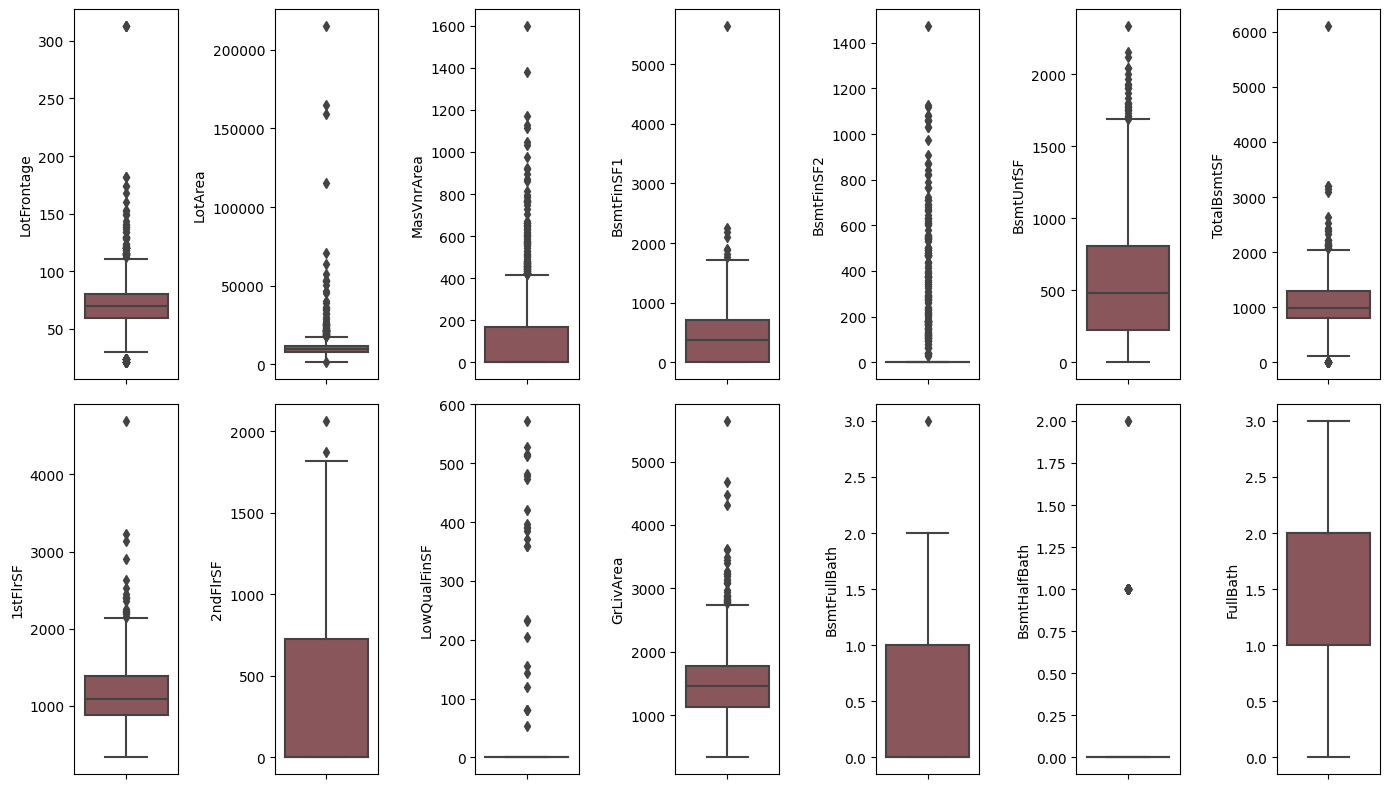

In [199]:
# Boxplot 1
figura = plt.figure(figsize=(14,8))

for i in range(0, len(num1)):
    plt.subplot(2, 7, i+1)
    sns.boxplot(y=df_train[num1[i]], color='#904E55')
    plt.tight_layout()

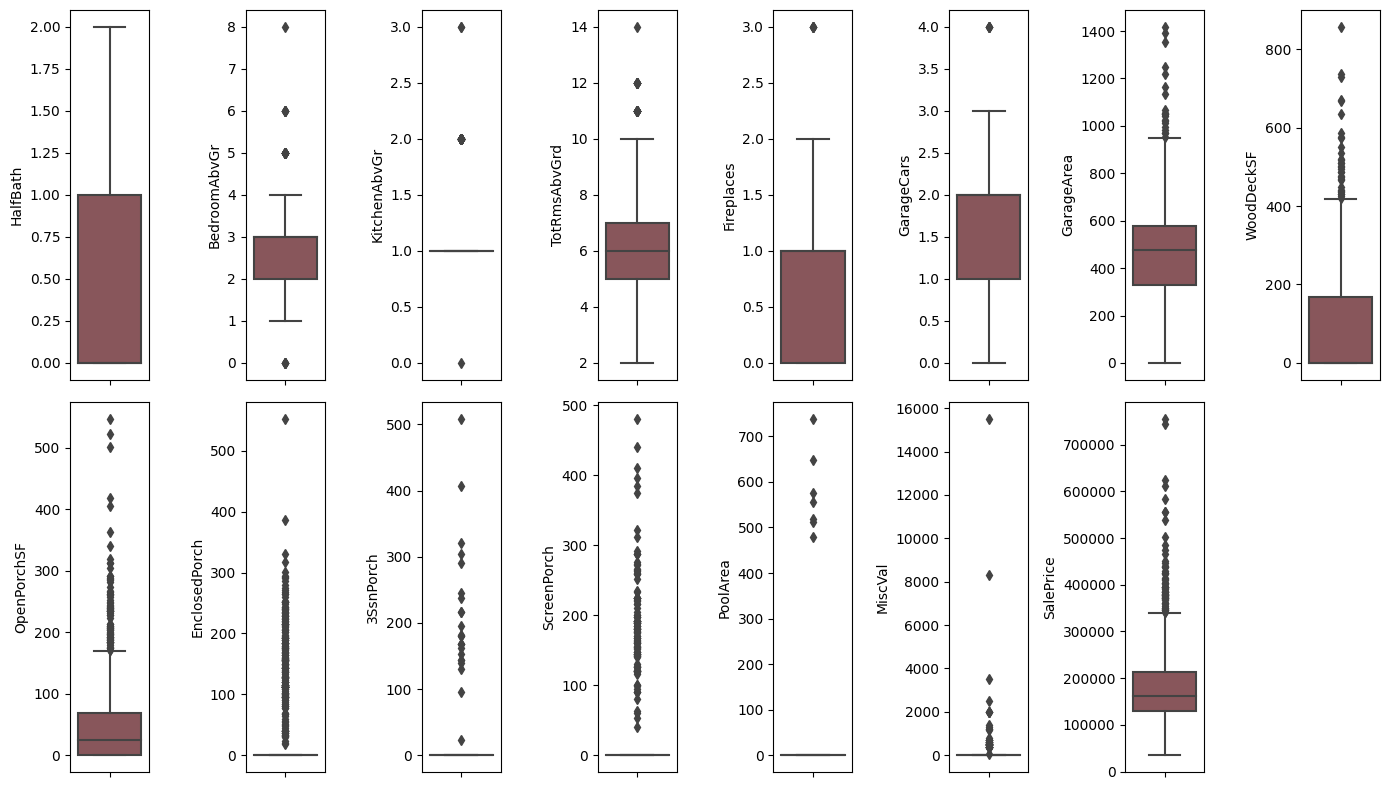

In [200]:
# Boxplot 2
figura = plt.figure(figsize=(14,8))

for i in range(0, len(num2)):
    plt.subplot(2, 8, i+1)
    sns.boxplot(y=df_train[num2[i]], color='#904E55')
    plt.tight_layout()

## Multivariat Analisis

In [201]:
data_train = pd.concat([df_train, 
                        df_train])
corr = data_train.corr()
corr.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,total_house_age,renov_age,garage_age
Street,-0.026253,0.098467,-0.027718,-0.197573,1.000000,0.015604,0.010050,-0.103863,-0.001691,-0.006939,0.179307,-0.012004,-0.009926,0.001783,-0.023425,0.010778,0.058763,0.043177,0.020878,0.065342,-0.019700,0.008126,0.006612,0.008563,0.015303,0.017326,0.100338,-0.015131,-0.035049,0.011230,-0.007705,-0.092655,0.016559,-0.015948,-0.078132,-0.038394,0.035284,0.004856,0.007948,0.043092,0.069789,-0.009173,0.005764,0.047122,0.007767,0.044063,-0.050899,0.015573,0.046376,0.027546,0.029030,0.013546,0.065609,0.046915,0.015222,-0.005449,0.023451,0.016897,0.032373,0.015263,-0.020218,-0.048011,0.027494,0.027493,0.024425,-0.017943,-0.005961,0.023140,0.007515,-0.033071,0.004437,0.004278,0.030369,-0.146660,-0.022703,0.003617,-0.025113,-0.039889,0.003214,0.040982,-0.021949,-0.066971,-0.066971
Electrical,-0.029311,-0.050349,-0.053895,-0.047002,-0.009173,0.073648,0.087783,0.037536,-0.058902,0.066598,0.000173,-0.085891,-0.068951,-0.014667,-0.047449,-0.069976,-0.240057,-0.097808,-0.322978,-0.340169,-0.039046,-0.003242,-0.035463,0.014722,-0.138941,-0.096582,-0.211397,-0.155195,0.151184,-0.292665,-0.252657,-0.154656,-0.205026,-0.158246,-0.065595,-0.028099,0.002011,-0.172818,0.224013,-0.193115,-0.397013,1.000000,-0.119018,-0.046841,0.020086,-0.124203,-0.123123,-0.023631,-0.173733,-0.128033,-0.048467,0.171086,-0.249843,-0.073454,0.099712,-0.126792,-0.144961,-0.230832,-0.144886,-0.237103,-0.233076,-0.220603,-0.190502,-0.200453,-0.271685,-0.148675,-0.102852,0.144942,-0.013269,-0.015943,-0.019139,-0.018455,-0.018737,-0.036237,-0.022148,0.003276,-0.038521,-0.040537,-0.062518,-0.232711,0.320769,0.337760,0.337760
EnclosedPorch,-0.005452,-0.057159,0.027457,-0.023094,0.023140,0.155951,0.098392,0.000167,0.009430,0.026111,0.008811,0.034040,-0.063456,0.019650,-0.116694,0.043042,-0.112950,0.074731,-0.386839,-0.192367,-0.019418,-0.028978,-0.028029,-0.016152,-0.157616,-0.110204,-0.150742,0.035279,0.208565,-0.180043,-0.040968,-0.094220,-0.136538,-0.105608,0.062607,0.036749,-0.003684,-0.099915,0.074351,-0.098378,-0.157523,0.144942,-0.072610,0.064217,0.061314,0.005813,-0.051483,-0.008518,-0.120246,-0.093258,0.038447,0.028587,-0.103330,0.000861,0.034608,-0.029461,-0.044495,-0.193221,-0.077039,-0.187814,-0.151857,-0.121603,-0.095222,-0.098355,-0.202476,-0.125486,-0.090870,1.000000,-0.037395,-0.083074,0.054397,0.091595,0.069477,0.036505,0.018445,-0.025830,-0.008496,-0.024362,-0.090082,-0.128778,0.385847,0.191859,0.191859
BldgType,0.735530,-0.249256,-0.381936,-0.210414,-0.023425,0.129375,0.137513,-0.054705,0.010935,0.049315,0.057026,-0.014013,-0.024182,0.019563,1.000000,0.031205,0.023786,-0.151329,0.198876,0.082857,-0.066067,-0.037513,-0.132122,-0.161945,0.123625,0.048772,0.076406,-0.064650,-0.123970,0.075653,-0.028332,0.012701,0.090728,-0.008435,-0.017023,-0.023760,-0.063106,-0.081214,0.011814,-0.007829,0.008516,-0.047449,-0.106287,-0.053757,-0.029731,-0.125241,0.041506,-0.009086,0.074453,0.013503,-0.243124,0.218013,0.029371,-0.178943,-0.003892,-0.114800,-0.092044,-0.055610,-0.046603,-0.017043,-0.020068,-0.084983,-0.039836,-0.044582,0.051085,-0.032077,-0.057228,-0.116694,-0.027464,-0.041631,-0.02869

In [161]:
corr.loc['MoSold', 'SalePrice']

0.04513617205884462

In [202]:
fillternih1 = corr['SalePrice']<=0.1
fillternih2 = corr['SalePrice']>=-0.1
len(df_train.columns) - len(corr[fillternih1 & fillternih2].index)

59

# Feature Selection

## Corelation Feature Selection

In [203]:
drop = corr[fillternih1 & fillternih2].index.to_list()

cor_train = df_train.drop(columns=drop + ['SalePrice'])                                                          
cor_test = df_test.drop(columns=drop)

# Data Scaling

In [204]:
fitur = df_train.drop(columns=["SalePrice"])
target = df_train[["SalePrice"]]

In [205]:
# Min-Max Scaler
minmax = MinMaxScaler()
MMscale_train = minmax.fit_transform(fitur)
MMscale_test = minmax.fit_transform(df_test)

MMcor_train = minmax.fit_transform(cor_train)
MMcor_test = minmax.fit_transform(cor_test)

# Standard Scaler
std = StandardScaler()
std_train = std.fit_transform(fitur)
std_test = std.fit_transform(df_test)

stdcor_train = std.fit_transform(cor_train)
stdcor_test = std.fit_transform(cor_test)

# PCA Reduction Matrics

In [206]:
pca1 = PCA(n_components=0.95)  # Menentukan jumlah komponen utama berdasarkan variansi yang dijelaskan (contoh: 95%)
pca_train = pca1.fit_transform(MMscale_train)

pca2 = PCA(n_components=len(pca1.explained_variance_ratio_))
pca_test = pca2.fit_transform(MMscale_test)

# Split Data

In [207]:
(X_train, X_test,
 Y_train, Y_test) = train_test_split(cor_train, target,
                                     test_size=0.25,
                                     random_state=42)

In [208]:
len(X_train.columns)

58

In [85]:
len(X_test.columns)

58

# Machine Learning Model

## Linear Regresi

In [87]:
simple_reg = LinearRegression()

simple_reg.fit(X_train, Y_train)

LinearRegression()

In [88]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[simple_reg.intercept_] + list(simple_reg.coef_[0])
})

coef_df.head(15)

,feature,coefficient
0,intercept,[-1133688.0021217137]
1,LotFrontage,-171.612019
2,LotArea,0.310179
3,LotShape,-95.428828
4,Neighborhood,435.974481
5,BldgType,-7859.592264
6,OverallQual,11225.458888
7,YearBuilt,227.948816
8,YearRemodAdd,316.753244
9,RoofStyle,3715.77324


## Random Forest

In [91]:
# Model ML
randomforest = RandomForestRegressor(random_state=42)

# Parameter yang akan diuji
rf_parameters = {
    'n_estimators': (5, 10, 20, 30, 50, 80, 100),
    'min_samples_leaf': (2, 3, 4, 5, 8, 10)
}

# Grid Search CV Tuning
rf_gridcv = GridSearchCV(randomforest, rf_parameters, cv=5, 
                         scoring='neg_root_mean_squared_error')
rf_gridcv.fit(X_train, Y_train)

c:\Users\M. Wahid Mudzakir\anaconda3\envs\main_project\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\M. Wahid Mudzakir\anaconda3\envs\main_project\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\M. Wahid Mudzakir\anaconda3\envs\main_project\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\M. Wahid Mudzakir\anaconda3\env

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': (2, 3, 4, 5, 8, 10),
                         'n_estimators': (5, 10, 20, 30, 50, 80, 100)},
             scoring='neg_root_mean_squared_error')

In [92]:
rfmodel = pd.DataFrame(rf_gridcv.cv_results_)
rfmodel.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.035727,0.035696,0.012685,0.000780,2,100,"{'min_samples_leaf': 2, 'n_estimators': 100}",-33783.556271,-33405.513752,-34328.786668,-31261.619554,-28687.587044,-32293.412658,2081.663737,1
5,0.794851,0.006468,0.007314,0.006090,2,80,"{'min_samples_leaf': 2, 'n_estimators': 80}",-34846.682566,-33573.296454,-34339.330263,-30925.512322,-28524.719378,-32441.908196,2379.370267,2
4,0.496129,0.005235,0.002674,0.005348,2,50,"{'min_samples_leaf': 2, 'n_estimators': 50}",-34938.355977,-34313.513635,-34340.504687,-30837.418307,-28420.073696,-32569.973260,2530.113212,3
3,0.306736,0.008425,0.002768,0.005277,2,30,"{'min_samples_leaf': 2, 'n_estimators': 30}",-36243.221425,-34488.112785,-34188.898635,-31410.212062,-28871.934603,-33040.475902,2596.405321,4
26,0.602912,0.004664,0.008009,0.003613,5,80,"{'min_samples_leaf': 5, 'n_estimators': 80}",-34024.213743,-33787.481480,-36908.065970,-31278.273995,-29679.696583,-33135.546354,2483.506055,5


## XG-Boost

In [89]:
# ML Model
xgb = XGBRegressor()

# Parameter yang akan diuji
xgb_parameters = {'gamma': [0, 1, 2, 5, 10, 20, 50], 
                  'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                  'subsample': [0.3, 0.5, 0.7, 1]}

# Grid Search CV Tuning
xgb_gridcv = GridSearchCV(xgb, xgb_parameters, cv=5, 
                          scoring='neg_root_mean_squared_error')

xgb_gridcv.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 5, 10, 20, 50],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             scoring='neg_root_mean_squared_error')

In [90]:
xgbmodel = pd.DataFrame(xgb_gridcv.cv_results_)
xgbmodel.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
91,0.118723,0.002952,0.003541,0.002624,10,0.2,1,"{'gamma': 10, 'learning_rate': 0.2, 'subsample...",-36033.902581,-33617.489606,-26600.437562,-31479.171731,-29037.881849,-31353.776666,3316.663993,1
31,0.118281,0.005548,0.005701,0.007036,1,0.2,1,"{'gamma': 1, 'learning_rate': 0.2, 'subsample'...",-36033.902581,-33617.489606,-26600.437562,-31479.171731,-29037.881849,-31353.776666,3316.663993,1
51,0.123141,0.005337,0.005698,0.006466,2,0.2,1,"{'gamma': 2, 'learning_rate': 0.2, 'subsample'...",-36033.902581,-33617.489606,-26600.437562,-31479.171731,-29037.881849,-31353.776666,3316.663993,1
131,0.124744,0.007278,0.000184,0.000369,50,0.2,1,"{'gamma': 50, 'learning_rate': 0.2, 'subsample...",-36033.902581,-33617.489606,-26600.437562,-31479.171731,-29037.881849,-31353.776666,3316.663993,1
11,0.119442,0.006744,0.006562,0.006164,0,0.2,1,"{'gamma': 0, 'learning_rate': 0.2, 'subsample'...",-36033.902581,-33617.489606,-26600.437562,-31479.171731,-29037.881849,-31353.776666,3316.663993,1


In [240]:
xgb_gridcv.best_params_

{'gamma': 0, 'learning_rate': 0.2, 'subsample': 1}

## Neural Network

In [71]:
# Fungsi untuk membuat model KerasRegressor
def create_regressor_model( units=32, dropout_rate=0.0, optimizer='adam', input_dim=len(cor_train.columns), evaluasi=['mse', 'mae']):
    """
    fungsi ini digunakan untuk membuat model neural network

    `units` : int | merupakan jumlah dense unit atau hiden layer dalam model neural network\n
    `dropout_rate` : float |\n
    `optimizer` : str | adam atau std\n
    `input_dim` : int | merupakan panjang dari feature\n
    `evaluasi` : list | 

    """

    # Model Layers
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=evaluasi)
    return model

In [72]:
# Membuat model KerasRegressor
NN_model = KerasRegressor(build_fn=create_regressor_model)

C:\Users\M. Wahid Mudzakir\AppData\Local\Temp\ipykernel_12732\1744302030.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  NN_model = KerasRegressor(build_fn=create_regressor_model)


In [73]:
param_grid = {'epochs': [10, 15, 20, 25],
              'dropout_rate': [0.0, 0.2, 0.5],
              #'optimizer': ['adam', 'sgd'],
              'units': [32, 64],
              'batch_size': [32]
}

NN_gridcv = GridSearchCV(estimator=NN_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [74]:
NN_gridcv.fit(X_train, Y_train)

Epoch 1/10
28/28 [==============================] - 2s 4ms/step - loss: 40075542528.0000 - mse: 40075542528.0000 - mae: 183439.7812
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 39215722496.0000 - mse: 39215722496.0000 - mae: 181250.7031
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 38229856256.0000 - mse: 38229856256.0000 - mae: 178706.0312
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 37041483776.0000 - mse: 37041483776.0000 - mae: 175548.5469
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 35549663232.0000 - mse: 35549663232.0000 - mae: 171595.5469
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: 33811304448.0000 - mse: 33811304448.0000 - mae: 166722.6406
Epoch 7/10
28/28 [==============================] - 0s 3ms/step - loss: 31863472128.0000 - mse: 31863472128.0000 - mae: 161138.5469
Epoch 8/10
28/28 [==============================] - 0s 3ms/step - loss: 2977

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002A2CF89EA40>,
             param_grid={'batch_size': [32], 'dropout_rate': [0.0, 0.2, 0.5],
                         'epochs': [10, 15, 20, 25], 'units': [32, 64]},
             scoring='neg_mean_squared_error')

# Evaluasi

## Linear Regresi

### Train Data Evaluation

In [93]:
lin_pred = simple_reg.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, lin_pred))
r2s = r2_score(Y_train, lin_pred)
mape = mean_absolute_percentage_error(Y_train, lin_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 32695.225176663665
R2 Score = 0.8298023591485492
MAPE     = 11.977%


### Test Data Evaluation

In [94]:
lin_pred = simple_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, lin_pred))
r2s = r2_score(Y_test, lin_pred)
mape = mean_absolute_percentage_error(Y_test, lin_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 30845.111564453106
R2 Score = 0.8483288354545766
MAPE     = 13.073%


## Random Forest

### Train Data Evaluation

In [95]:
rf_pred = rf_gridcv.best_estimator_.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, rf_pred))
r2s = r2_score(Y_train, rf_pred)
mape = mean_absolute_percentage_error(Y_train, rf_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 13995.8819786005
R2 Score = 0.968812151663083
MAPE     = 4.511%


### Test Data Evaluation

In [96]:
rf_pred = rf_gridcv.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))
r2s = r2_score(Y_test, rf_pred)
mape = mean_absolute_percentage_error(Y_test, rf_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 24924.72500168264
R2 Score = 0.9009644583264211
MAPE     = 9.901%


## XG-Boost

### Train Data Evaluation

In [97]:
xgb_pred = xgb_gridcv.best_estimator_.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, xgb_pred))
r2s = r2_score(Y_train, xgb_pred)
mape = mean_absolute_percentage_error(Y_train, xgb_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 2285.0761726731303
R2 Score = 0.9991686455342681
MAPE     = 1.071%


### Test Data Evaluation

In [98]:
xgb_pred = xgb_gridcv.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, xgb_pred))
r2s = r2_score(Y_test, xgb_pred)
mape = mean_absolute_percentage_error(Y_test, xgb_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

RMSE     = 23304.633327906144
R2 Score = 0.9134205387734059
MAPE     = 9.713%


## Neural Network

### Train Data Evaluation

In [84]:
NN_pred = NN_gridcv.best_estimator_.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, NN_pred))
r2s = r2_score(Y_train, NN_pred)
mape = mean_absolute_percentage_error(Y_train, NN_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

 1/35 [..............................] - ETA: 0s

35/35 [==============================] - 0s 2ms/step
RMSE     = 65352.219411742095
R2 Score = 0.3200052609268993
MAPE     = 23.258%


### Test Data Evaluation

In [82]:
NN_pred = NN_gridcv.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, NN_pred))
r2s = r2_score(Y_test, NN_pred)
mape = mean_absolute_percentage_error(Y_test, NN_pred)

print(f'''RMSE     = {rmse}
R2 Score = {r2s}
MAPE     = {round(mape*100, 3)}%''')

12/12 [==============================] - 0s 1ms/step
RMSE     = 55450.35942432784
R2 Score = 0.5098386520380692
MAPE     = 22.395%


# Prediction

In [83]:
predict_test_data = pd.DataFrame(xgb_gridcv.predict(MMcor_test), columns=['SalePrice'])
predict_test_data

,SalePrice
0,43874.921875
1,46744.457031
2,46744.457031
3,46744.457031
4,43874.921875
...,...
1454,46744.457031
1455,46744.457031
1456,43874.921875
1457,43874.921875
